<a href="https://colab.research.google.com/github/binary-ibex/AI-practicals/blob/main/notebooks/A_star_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A* algorithm
A* algorithm is similar to Dijkstra's algorithm, but it is far more efficient than it. The A* algorithm introduces a heuristic into a regular graph-searching algorithm, essentially planning ahead at each step so a more optimal decision is made.

> Note: understanding Dijkstra's algorithm is essential to understand the A* algorithm, because A* is just the small extension to the Dijkstra algorithm.

The problem with the Dijkstra algorithm is it follows the path which is currently the shortest and does not pay any attention to in which direction it is going. A* solves this problem by adding the total path cost with the heuristic at each node.  


## What is heuristic ?

Heuristic is anything that give the direction of the goal, it means how far we are away from the goal. Here we use the  euclidean distance as the heuristic. It is just the distance between the two points in the graph.

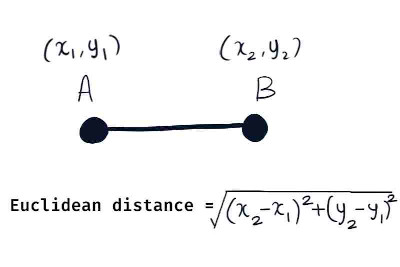

Let's perform the A* algorithm on the graph given below

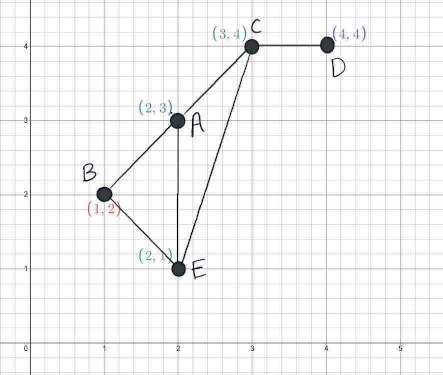

### Execution
```
Here assume weight of each node is equal to 1

visited = []

initial distance from node B =
B = 0
A = inf
E = inf
C = inf
D = inf      


current node B:


neighbour: A E

Euclidean distance:

 h(A) =  2.24
 h(E) = 3.61

weight :
 g(A) = 1
 g(E) = 1

New value of node A = 1 ...(since 1<inf)
New value of node E = 1 ...(since 1<inf)

Total distance A = g(D) + h(D) = 1 + 2.24 = 3.24
Total distance B = g(D) + h(D) = 1 + 3.61 = 4.61

Add node B to the visited list
visited = [B]

push nodes inside the sorted list

[(A , 3.24) , (E , 4.61)]

pop node A from the list

============================================

current node : A

neighbours: B E C

Here Bis already visited so we do not include it in calculation

Euclidean distance:

 h(E) = 3.61
 h(C) = 1

weight :

 g(E) = 2 ...(Total distance from node B)
 g(C) = 2 ...(Total distance from node B)

New value of node E = 1 ...(1<2)
New value of node C = 2 ...(2<inf)

Total distance E = g(D) + h(D) = 2 + 3.61 = 5.61
Total distance C = g(D) + h(D) = 2 + 1 = 3

Add node A to the visited list
visited = [B, A]

push node C  inside the sorted list

[(C, 3), (E , 4.61)]

pop node C from the list

===========================================

current node : C

neighbour: A D

Here A is already visited so we do not include it in calculation

Euclidean distance:


 h(D) = 0


weight :

 g(D) = 3 ...(Total distance from node B)


New value of node D = 3 ...(3<inf)


Total distance E = g(D) + h(D) = 3 + 0 = 3


Add node C to the visited list
visited = [B, A, C]

push node D  inside the sorted list

[(D, 3), (E , 4.61)]

pop node D from the list

========================

current node : D

Since all neighbours of the node D is already visited hence traversing end.

Add node D to visited list

visited = [B, A, C, D]

Shortest path to visit node

B = 0
A = 1
E = 1
C = 2
D = 3

shortest path to node D =

B > A > C > D

As you can observe A_star algorithm prevent us from visiting unnecessary nodes, adding heuristic to the total weight. In our case it prevent us from visiting node E.

```


In [ ]:
def a_star_search(graph, start, end):

    if start not in graph.keys():
        return None

    if start == end:
        retrun [start]

    #backtrack for constructing path  
    backtrack = {}

    #set the initial distance of every node from start node to infinity
    for node in graph.keys():
        backtrack[node] = [0 if node == start else float('inf'), None]

    #path
    path = []

    #temp array for sorting
    temp = [(start, 0)]

    #visited list
    visited = []
    while(temp):

        #pooping the node with minimum cost and heuristic
        N = temp.pop(0)[0]

        #This will show us how algorithm is searching
        print(N)

        # if we find the destination the construct the path and return it
        if N == end:
            while(end):
                path = [end] + path
                end = backtrack[end][1]
            return path

        #if node not visited then add it to visited list
        if N not in visited:
            visited.append(N)

            #loop through the given dictionary [0] is the index of dictionary and [1] is the index of the heuristic of the specific node
            for node, distance in graph[N][0].items():

                #Total distance
                g = graph[N][0][node] + backtrack[N][0]

                #add heuristic to total distance
                f = g + graph[node][1]
                temp.append((node, f))

                #keep track of previous node and weight
                if g<backtrack[node][0]:
                    backtrack[node][0] = g
                    backtrack[node][1] = N

                #sorting the list of nodes
                temp = list(sorted(temp, key= lambda x:x[1]))


    # if no path is found return None
    return None


#implement the graph with the heuristic  assign to every node.
# I pre-calculated the euclidean distance
graph = {
    'A' : ({'B' : 1, 'C' : 1, 'E' : 1}, 2.24),
    'B' : ({'E' : 1, 'A' : 1}, 3.61),
    'C' : ({'D' : 1, 'A' : 1, 'E' : 1}, 1.0),
    'D' : ({'C' : 1}, 0),
    'E' : ({'B' : 1, 'A' : 1, 'C' : 1}, 3.61)
    }


#print the result  
print (a_star_search(graph, 'B' , 'D'))



### finding path in same graph using Dijkstra algorithm

In [ ]:
def dijkstra(graph, start, end):
    #dictionary for constructing path by storing previous node in it
    backtrack = {}

    #initializing all node distance from start to infinity
    for node in graph.keys():
        backtrack[node] = [0 if node == start else float('inf'), None]

    #empty path list
    path = []

    #temporary list
    temp = [(start, 0)]

    #keep track of visited node
    visited = []

    while(temp):
        #poping node at minimum distance from the source in temp list
        N = temp.pop(0)[0]
        if N not in visited:
            visited.append(N)
            print(N)
            #if we found the target then generate path and return it
            if N == end:
                while(end):
                    path = [end] + path
                    end = backtrack[end][1]
                return path
            for node, distance in graph[N].items():
                if node not in visited:
                    g = graph[N][node] + backtrack[N][0]

                    if g<backtrack[node][0]:
                        backtrack[node][0] = g
                        backtrack[node][1] = N
                    temp.append((node, g))



            temp = list(sorted(temp, key= lambda x:x[1]))


    #if no path found return None
    return None

graph = {
    'A' : {'B' : 1, 'C' : 1, 'E' : 1},
    'B' : {'E' : 1, 'A' : 1},
    'C' : {'D' : 1, 'A' : 1, 'E' : 1},
    'D' : {'C' : 1},
    'E' : {'B' : 1, 'A' : 1, 'C' : 1}
    }

print(dijkstra(graph, 'B', 'D'))


## observation

As you can observe both Dijkstra and A* algorithm give us shortest path from start node to end node, but Dijkstra algorithm waste time in visiting unnecessary nodes in our case it is node E. Even though the path length in both cases are same, Dijkstra takes more time than A* to find the shortest path. One can imagine how much time A* algorithm saves on the huge graph, like the complex road networks.


## Best resources to learn A* algorithm

1. [A* search](https://brilliant.org/wiki/a-star-search)
2. [what-is-the-a-star-algorithm](https://www.educative.io/edpresso/what-is-the-a-star-algorithm)